In [11]:
import numpy as np
import pandas as pd
import pickle

## Imports
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler

## Embeddings
from flair.data import Sentence
from flair.embeddings import FlairEmbeddings

from tqdm import tqdm_notebook

In [12]:
flair_embedding_forward = FlairEmbeddings('news-forward')

In [48]:
def get_flair_embedding(sent):
    sentence = Sentence(sent)
    flair_embedding_forward.embed(sentence)
    all_tensors = torch.zeros(flair_embedding_forward.embedding_length)
    for token in sentence:
        all_tensors+=token.embedding
    return all_tensors/len(sentence)

In [49]:
def get_cosine_distance(text_1, text_2):
    cos = nn.CosineSimilarity(dim=0, eps=1e-6)
    cos_sim = cos(text_1, text_2)
    return cos_sim.detach().numpy()

In [50]:
def get_flair_embedding_batch(sent_list):
    size_array = len(sent_list)
    tensor_array = torch.full((len(sent_list), flair_embedding_forward.embedding_length), fill_value = 0)
    for i,sent in enumerate(sent_list):
        sentence = Sentence(sent)
        flair_embedding_forward.embed(sentence)
        all_tensors = torch.zeros(flair_embedding_forward.embedding_length)
        for token in sentence:
            all_tensors+=token.embedding
        all_tensors_avg = all_tensors/len(sentence)
        tensor_array[i]=all_tensors_avg
    return tensor_array

In [51]:
cv_1 = 'I am a software engineer'
a = get_flair_embedding(cv_1)
print(a.shape)
a

torch.Size([2048])


tensor([ 0.0030, -0.0027,  0.0858,  ..., -0.0011,  0.0050,  0.0062])

In [52]:
CV = ["I am a software engineer",
      "I do software for a living",
      "I'm a programmer since 15 years",
      "I am software manager for 10 years",
      "I like to cook",
      "I am a chef in a renowed restaurant",
      "Working delivering pizza to pay my studies",
      "I made cakes and hamburguers",
      "Doing management tasks and scheduling meetings",
      "Secretary in a large corporation",
      "I use the computer to build software",
      "I work in contruction building for 15 years",
      "Working in building stuff like homes and apartments",
      "Working in oil and gas for 15 years",
      "Experience in oil companies"]

In [53]:
all_cvs_numpy = get_flair_embedding_batch(CV).detach().numpy()
all_cvs_numpy

array([[ 3.0461233e-03, -2.7145294e-03,  8.5849687e-02, ...,
        -1.0630406e-03,  4.9772570e-03,  6.1684633e-03],
       [ 3.8238652e-03,  7.9953425e-05,  3.6519758e-02, ...,
        -8.2150224e-04,  6.1770831e-03,  8.0903852e-04],
       [ 3.6503153e-03,  2.1388313e-04,  4.9689848e-02, ...,
        -1.6908474e-03,  1.1161077e-02,  5.8155512e-03],
       ...,
       [-7.3153083e-04,  5.5034843e-04,  3.3049077e-02, ...,
        -6.4577502e-03, -7.5732241e-03,  7.9196934e-03],
       [ 1.5877507e-03,  1.3479283e-03,  3.7679702e-02, ...,
        -9.1867149e-04,  4.1008047e-03,  7.7034612e-03],
       [-4.2764209e-03,  4.1942662e-03,  1.7541979e-02, ...,
        -2.5532924e-04,  6.3910044e-04,  2.0790052e-02]], dtype=float32)

In [54]:
## Plot embeddings in low dim space
%matplotlib inline
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [60]:
## Convert vectors to TSNE
tsne=TSNE(n_components=2,perplexity = 4,verbose=1)
sentences_tsne = tsne.fit_transform(all_cvs_numpy)
sentences_tsne

[t-SNE] Computing 13 nearest neighbors...
[t-SNE] Indexed 15 samples in 0.000s...
[t-SNE] Computed neighbors for 15 samples in 0.001s...
[t-SNE] Computed conditional probabilities for sample 15 / 15
[t-SNE] Mean sigma: 0.549362
[t-SNE] KL divergence after 250 iterations with early exaggeration: 75.428940
[t-SNE] Error after 1000 iterations: 0.171314


array([[   6.1028733, -133.29736  ],
       [-113.14924  ,  -68.341606 ],
       [ -76.27819  , -182.3495   ],
       [ -43.950615 ,  -91.07717  ],
       [-182.29552  ,  -73.99298  ],
       [  59.05978  , -136.06102  ],
       [  42.70169  ,  151.83221  ],
       [-235.59549  ,  -39.295795 ],
       [ 158.16393  ,  190.53621  ],
       [ 131.19644  , -140.52715  ],
       [-111.626976 ,  -13.334398 ],
       [  -9.47552  ,  -31.864067 ],
       [ 102.05722  ,  131.49683  ],
       [ 105.35903  ,   82.54246  ],
       [ 181.61325  ,  129.93951  ]], dtype=float32)

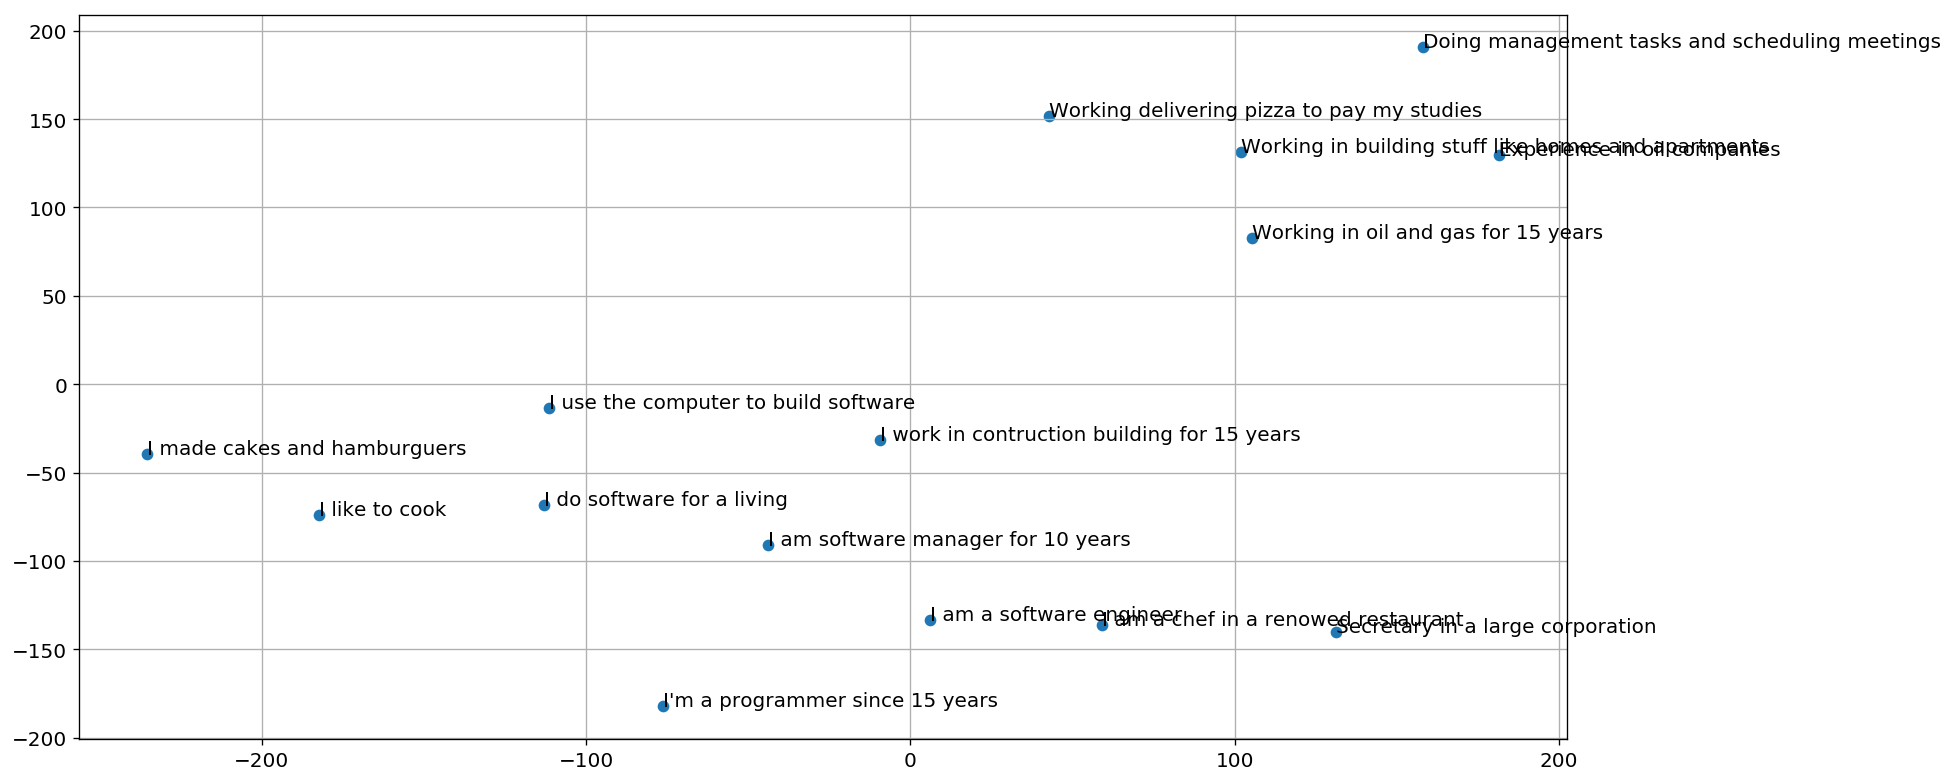

In [61]:
plt.figure(num=None, figsize=(16, 8), dpi=120, facecolor='w', edgecolor='k')
plt.grid()
plt.scatter(sentences_tsne[:,0], sentences_tsne[:,1])
for label, x, y in zip(CV,sentences_tsne[:,0], sentences_tsne[:,1]):
    font = {'size' : 12, 'weight' : 'normal'}
    plt.rc('font', **font)
    plt.annotate(label, xy=(x, y), xytext=(0, 0), textcoords='offset points')